In [15]:
#VSE SKUPAJ-----CV verzija 29.12.2021---------------IMAGES--------------------basic kNN with euclidean metric-----------------------------
#1) load data IMAGES	2) define PM	4) lmnn	4) knn	5) CV


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score   #for crossvalidation
from sklearn.model_selection import StratifiedKFold

from pylmnn import LargeMarginNearestNeighbor as LMNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score    #for confusion matrix
from sklearn import datasets, neighbors, metrics   # Import datasets, classifiers and performance metrics

from sklearn.preprocessing import Normalizer	#for normalization

from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import StandardScaler    ##for standardization-Gaussian with zero mean and unit variance.

#BMB
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline

In [16]:
df = pd.read_csv('fotovseColorLayresample150.csv', header=None)
df.iloc[:,33].unique() # 
df.count(axis=0, level=None, numeric_only=False)

0     7939
1     7939
2     7939
3     7939
4     7939
5     7939
6     7939
7     7939
8     7939
9     7939
10    7939
11    7939
12    7939
13    7939
14    7939
15    7939
16    7939
17    7939
18    7939
19    7939
20    7939
21    7939
22    7939
23    7939
24    7939
25    7939
26    7939
27    7939
28    7939
29    7939
30    7939
31    7939
32    7939
33    7939
dtype: int64

In [17]:
# X: the data to fit. Can be for example a list, or an array. y: the target variable to try to predict in the case of supervised learning.
#for iris dataset: X, y = datasets.load_iris(return_X_y=True)  	
#X, y = datasets.load_digits(return_X_y=True)
#print(datasets.load_digits(return_X_y=True))
#X,y = datasets.load_digits(return_X_y=True)
#X, y = datasets.load_iris(return_X_y=True)		#X--data, y--class

train_df = pd.read_csv('fotovseColorLayresample150.csv', header=None)
X = np.array(train_df.iloc[:, :-1])	#all rows & all column except last one
#print(train_data)
y = np.array(train_df.iloc[:, -1])   #all rows & only last column

#BMB define train and test splits
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=52)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=52)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9) # create a validation set from the already splited training set

X.shape
print(f"Mn X {X.shape}")

# BMB
X_train.shape
X_test.shape 
y_train.shape 
y_test.shape

print(f"Mn X_train {X_train.shape}")
print(f"Mn X_test {X_test.shape}")
print(f"Mn y_train {y_train.shape}")
print(f"Mn y_test {y_test.shape}")
print(f"Mn X_valid {X_valid.shape}")
print(f"Mn y_valid {y_valid.shape}")

Mn X (212, 630)
Mn X_train (114, 630)
Mn X_test (85, 630)
Mn y_train (114,)
Mn y_test (85,)
Mn X_valid (13, 630)
Mn y_valid (13,)


In [18]:
#BMB Not sure if normalisation oges in steps

transformer = Normalizer().fit(X_train)
X_train = transformer.transform(X_train)

transformer = Normalizer().fit(X_test)
X_test = transformer.transform(X_test)

transformer = Normalizer().fit(X_valid)
X_valid = transformer.transform(X_valid)

In [19]:
#print(X)
#print(y)
#Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated = standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_valid)
X_valid = scaler.transform(X_valid)


# LMNN: algorithm for metric learning---------------------after cross validation
# Set up the hyperparameters
k_train, k_test, max_iter = 2, 2, 2000	#n_components=X.shape[1], za bpp:640



In [20]:
#Define functions to compute the value of the distance metrics: Poincare; ŠE NI OK
#Define functions to compute the value of the distance metrics: Poincare; ŠE NI OK
#@staticmethod
def poin_distance(row1, row2):
    #print('len(row1) = ',len(row1))
    #print('len(row1) = ',len(row1))
    distance = 0.0
    d = 0.0
    norm1 = 0.0
    norm2 = 0.0
    for i in range(len(row1)):		#for i in range(len(row1)-1):
        #print(i)
        d = d + (row1[i] - row2[i])*(row1[i] - row2[i])
        #print(d)
        norm1 = norm1 + (row1[i] * row1[i])
        #print(norm1)
        norm2 = norm2 + (row2[i] * row2[i])
        #print(norm2)
    
    m = 1 + 2*d/((1-norm1)*(1-norm2))
    distance = np.log(1+m + np.sqrt(m*m - 1)) # BMB dodano 1+
    
    return(distance)
    
    
# BMB: how do we define the diference between the nominal values? Is that also included, for the last value in each raw?

In [21]:
# Point Distanca Pavle Biljana
#Define functions to compute the value of the distance metrics: Poincare; ŠE NI OK
#Define functions to compute the value of the distance metrics: Poincare; ŠE NI OK
#@staticmethod
def poin_distanceBMB(row1, row2):
    #print('len(row1) = ',len(row1))
    #print('len(row1) = ',len(row1))
    distance = 0.0
    d = 0.0
    norm1 = 0.0
    norm2 = 0.0
    
    d = (row1 - row2)*(row1 - row2)
    d = d.sum()
    
    norm1 = row1 * row1
    norm1 = norm1.sum()
    
    norm2 = row2 * row2
    norm2 = norm2.sum()
    
    m = 1 + 2*d/((1-norm1)*(1-norm2))
    distance = np.log(1+m + np.sqrt(m*m - 1)) # BMB dodano 1+
    
    return(distance)
    
    
# BMB: how do we define the diference between the nominal values? Is that also included, for the last value in each raw?

In [22]:
#c = [1,2,3]
#d = [7,3,4]
#BMB_distance(X_train,y_train)


#%timeit poin_distanceBMB(df.iloc[1,:-1], df.iloc[2,:-1])


#X = poin_distanceBMB(df.iloc[1,:-1], df.iloc[2,:-1])
#X1=poin_distance(df.iloc[1,:-1], df.iloc[2,:-1])

#len(df.iloc[1,:])
#len(df.iloc[1,:])
#df.iloc[1,:]


In [23]:
X_train.shape, y_train.shape

((114, 630), (114,))

In [24]:
# Instantiate the metric learner
lmnn = LMNN(n_neighbors=k_train, max_iter=max_iter)

# Train the metric learner
lmnn.fit(X_valid, y_valid)

LargeMarginNearestNeighbor(callback=None, impostor_store='auto', init='pca',
                           max_impostors=500000, max_iter=2000,
                           n_components=None, n_jobs=1, n_neighbors=2,
                           neighbors_params=None, random_state=None,
                           store_opt_result=False, tol=1e-05, verbose=0,
                           warm_start=False, weight_push_loss=0.5)

In [25]:
##BMB

#Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated = standardization
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)


# LMNN: algorithm for metric learning---------------------after cross validation

### BMB Hyperparameters should be set on a different dataset, for example a cross-validation dataset
# Set up the hyperparameters
#k_train, k_test, max_iter = 3, 3, 2000	#n_components=X.shape[1], za bpp:640

# Instantiate the metric learner
#lmnn = LMNN(n_neighbors=k_train, max_iter=max_iter)

# Train the metric learner
#lmnn.fit(X_valid,y_valid)

In [26]:
# Create a classifier: a knn with PM
acc1 = []
acc1_train = []
for i in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, metric='pyfunc', metric_params={"func":poin_distanceBMB}).fit(X_train,y_train) 	#to add new metric: metric='pyfunc'
    #for testing
    #knn = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='euclidean')    #algorithm='ball_tree' - for a custom metric

    # Learn the digits/iris on the train subset - fit the model
    # BMB: Mi ni jasno kako funkciji lmnn damo Poankare distance?
    knn.fit(lmnn.transform(X_train),y_train)
 
    # Predict the value of the digit on the test subset  and calculate the accuracy
    predicted = knn.predict(lmnn.transform(X_test))
    acc1.append(metrics.accuracy_score(y_test, predicted))
    #acc1.append(knn.score(y_test, predicted))
    
    # Predict the value of the digit on the test subset  and calculate the accuracy of the trining set
    predicted_train= knn.predict(lmnn.transform(X_train))   
    acc1_train.append(metrics.accuracy_score(y_train, predicted_train))
    
   
    
    

    #for output in txt file
  #  with open("outputjapanPhogPM.txt", "a") as f:
  #      print(f"Classification report for classifier {knn}:\n"
  #            f"{metrics.classification_report(y_test, predicted)}\n", file=f)   
  #      print('Name of data:', file=f)

  #      # Print out confusion matrix
  #      cmat = confusion_matrix(y_test, predicted)	#print(cmat)

  #      print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))), file=f) ## TUKAJ JE OCITNO NAPAKA
  #      print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))), file=f)

  #      print(cmat, file=f)

  #      print('Diagonal (sum): ', np.trace(cmat), file=f)
  #      print("All Instances:", np.sum(cmat), file=f)
  #      print("Correctly Classified Instances:", np.trace(cmat)/np.sum(cmat), file=f)
  #      print('Number of neighbors: ', i, file=f)


Maximum accuracy: 0.7294117647058823 at K = 11


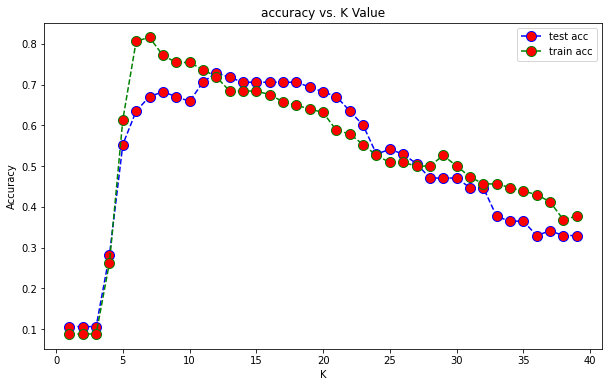

In [27]:
plt.figure(figsize=(10,6))
# Plot the accuracy on the test data
plt.plot(range(1,40),acc1,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label='test acc')
# Plot the accuracy on the training data
plt.plot(range(1,40),acc1_train,color = 'green',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label='train acc')

plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
print("Maximum accuracy:",max(acc1),"at K =",acc1.index(max(acc1)))

# Visualise accuracy vs K value
see https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

Maximum accuracy: 0.6470588235294118 at K = 10


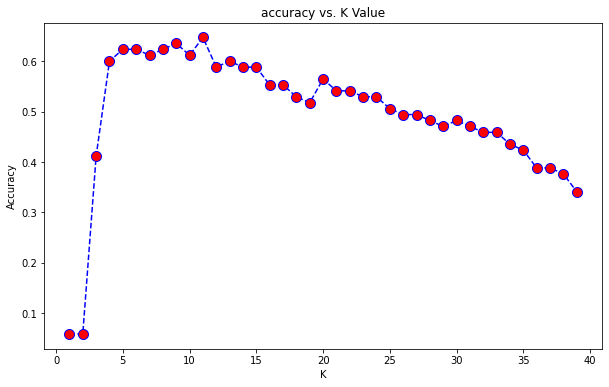

In [198]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i, metric='pyfunc', metric_params={"func":poin_distanceBMB}).fit(X_train,y_train)
    neigh.fit(lmnn.transform(X_train),y_train)
    yhat = neigh.predict(lmnn.transform(X_test))
    #yhat = neigh.predict(lmnn.transform(X_test))
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:", max(acc),"at K =",acc.index(max(acc)))

In [199]:
neigh = KNeighborsClassifier(n_neighbors = i, metric='pyfunc', metric_params={"func":poin_distanceBMB}).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='pyfunc',
                     metric_params={'func': <function poin_distanceBMB at 0x7fde4b41c510>},
                     n_jobs=None, n_neighbors=39, p=2, weights='uniform')

In [200]:
neigh.fit(lmnn.transform(X_train),y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='pyfunc',
                     metric_params={'func': <function poin_distanceBMB at 0x7fde4b41c510>},
                     n_jobs=None, n_neighbors=39, p=2, weights='uniform')

In [201]:
yhat

array(['kl', 'uy', 'nm', 'kl', 'na', 'tm', 'kl', 'kl', 'na', 'uy', 'na',
       'kl', 'tm', 'kl', 'kl', 'kl', 'kl', 'kl', 'kl', 'kl', 'tm', 'kl',
       'tm', 'kl', 'tm', 'tm', 'tm', 'kl', 'kl', 'tm', 'na', 'tm', 'uy',
       'kl', 'tm', 'km', 'tm', 'tm', 'uy', 'kl', 'na', 'km', 'uy', 'tm',
       'uy', 'kl', 'uy', 'uy', 'tm', 'kl', 'na', 'na', 'kl', 'kl', 'uy',
       'na', 'na', 'kr', 'uy', 'km', 'uy', 'kr', 'kl', 'kl', 'nm', 'kl',
       'tm', 'kl', 'na', 'uy', 'tm', 'tm', 'kl', 'kl', 'km', 'km', 'tm',
       'tm', 'km', 'km', 'tm', 'km', 'tm', 'kl', 'kl'], dtype=object)

In [202]:
y_test, predicted

(array(['kl', 'kr', 'nm', 'km', 'tm', 'kr', 'mk', 'kl', 'tm', 'uy', 'ym',
        'kl', 'ym', 'na', 'mk', 'na', 'na', 'na', 'mk', 'mk', 'ym', 'kl',
        'ka', 'kl', 'nm', 'tm', 'uy', 'mk', 'na', 'kr', 'ka', 'tm', 'uy',
        'kl', 'uy', 'km', 'km', 'ym', 'uy', 'ka', 'ym', 'km', 'km', 'ym',
        'nm', 'na', 'uy', 'nm', 'kr', 'kl', 'tm', 'mk', 'mk', 'na', 'uy',
        'ym', 'kr', 'kr', 'uy', 'km', 'kr', 'km', 'ka', 'ka', 'nm', 'kl',
        'tm', 'ka', 'ym', 'uy', 'ym', 'ym', 'mk', 'mk', 'km', 'kr', 'km',
        'tm', 'km', 'km', 'kr', 'km', 'ym', 'na', 'mk'], dtype=object),
 array(['kl', 'uy', 'nm', 'kl', 'na', 'tm', 'kl', 'kl', 'na', 'uy', 'na',
        'kl', 'tm', 'kl', 'kl', 'kl', 'kl', 'kl', 'kl', 'kl', 'tm', 'kl',
        'tm', 'kl', 'tm', 'tm', 'tm', 'kl', 'kl', 'tm', 'na', 'tm', 'uy',
        'kl', 'tm', 'km', 'tm', 'tm', 'uy', 'kl', 'na', 'km', 'uy', 'tm',
        'uy', 'kl', 'uy', 'uy', 'tm', 'kl', 'na', 'na', 'kl', 'kl', 'uy',
        'na', 'na', 'kr', 'uy', 'km', 'u

In [203]:
u, indices = np.unique(predicted, return_index=True)
u

array(['kl', 'km', 'kr', 'na', 'nm', 'tm', 'uy'], dtype=object)

In [204]:
u, indices = np.unique(y_test, return_index=True)
u

array(['ka', 'kl', 'km', 'kr', 'mk', 'na', 'nm', 'tm', 'uy', 'ym'],
      dtype=object)

In [205]:
u, indices = np.unique(y_train, return_index=True)
u

array(['ka', 'kl', 'km', 'kr', 'mk', 'na', 'nm', 'tm', 'uy', 'ym'],
      dtype=object)